In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("TATAMOTORS.NS.csv")

dt_series = pd.Series([item for item in df['Date']], index=df.index)
dt_series = pd.to_datetime(dt_series)

df = df.drop(columns=['Date'], axis=1)
df.insert(loc=0, column='DateTime', value=dt_series)

# Get the Pandas series containing the year values as integers.
year_series = dt_series.dt.year

# Get the Pandas series containing the month values as integers.
month_series = dt_series.dt.month

# Get the Pandas series containing the day values as integers.
day_series = dt_series.dt.day

# Get the Pandas series containing the days of a week, i.e., Monday, Tuesday, Wednesday etc.
day_name_series = dt_series.dt.day_name()

# Add the 'Year', 'Month', 'Day' and 'Day Name' columns to the DataFrame.
df['Year'] = year_series
df['Month'] = month_series
df['Day'] = day_series
df['Day Name'] = day_name_series
df=df.sort_values(by='DateTime')

df

,DateTime,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Day Name
0,1996-01-01,72.436363,77.418762,68.028862,70.472153,51.748981,1933134,1996,1,1,Monday
1,1996-02-01,70.472153,85.275620,69.983498,80.983093,59.467365,4328891,1996,2,1,Thursday
2,1996-03-01,80.983093,90.056801,78.443985,86.243355,63.330063,3503607,1996,3,1,Friday
3,1996-04-01,86.243355,97.731606,83.455124,91.609009,67.270164,5562777,1996,4,1,Monday
4,1996-05-01,91.609009,96.773453,82.976051,92.902512,68.220001,8761639,1996,5,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
301,2021-02-01,269.750000,341.899994,255.350006,322.950012,322.950012,2011804897,2021,2,1,Monday
302,2021-03-01,330.000000,357.000000,282.250000,301.799988,301.799988,1453844779,2021,3,1,Monday
303,2021-04-01,306.750000,325.000000,280.549988,293.850006,293.850006,1147880867,2021,4,1,Thursday
304,2021-05-01,289.299988,334.750000,285.000000,326.000000,326.000000,413308597,2021,5,1,Saturday


In [ ]:
aq_1996_df = df[df['Year'] == 1996]
aq_2021_df = df[df['Year'] == 2021]
aq_1996_df

,DateTime,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Day Name
0,1996-01-01,72.436363,77.418762,68.028862,70.472153,51.748981,1933134,1996,1,1,Monday
1,1996-02-01,70.472153,85.275620,69.983498,80.983093,59.467365,4328891,1996,2,1,Thursday
2,1996-03-01,80.983093,90.056801,78.443985,86.243355,63.330063,3503607,1996,3,1,Friday
3,1996-04-01,86.243355,97.731606,83.455124,91.609009,67.270164,5562777,1996,4,1,Monday
4,1996-05-01,91.609009,96.773453,82.976051,92.902512,68.220001,8761639,1996,5,1,Wednesday
5,1996-06-01,92.902512,103.672157,92.931259,98.708923,72.483772,19383899,1996,6,1,Saturday
6,1996-07-01,98.354408,109.229439,90.449638,98.268173,72.990723,10488398,1996,7,1,Monday
7,1996-08-01,98.114868,99.073021,86.617027,97.587883,72.485428,8297203,1996,8,1,Thursday
8,1996-09-01,99.456284,100.222801,83.953362,85.821762,63.745888,17326554,1996,9,1,Sunday
9,1996-10-01,85.860092,86.233772,73.011261,79.469208,59.027405,24344484,1996,10,1,Tuesday


In [ ]:
aq_2021_df

,DateTime,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Day Name
300,2021-01-01,184.949997,306.899994,184.500000,262.700012,262.700012,3110819324,2021,1,1,Friday
301,2021-02-01,269.750000,341.899994,255.350006,322.950012,322.950012,2011804897,2021,2,1,Monday
302,2021-03-01,330.000000,357.000000,282.250000,301.799988,301.799988,1453844779,2021,3,1,Monday
303,2021-04-01,306.750000,325.000000,280.549988,293.850006,293.850006,1147880867,2021,4,1,Thursday
304,2021-05-01,289.299988,334.750000,285.000000,326.000000,326.000000,413308597,2021,5,1,Saturday
305,2021-05-12,318.250000,334.750000,316.250000,326.000000,326.000000,111540375,2021,5,12,Wednesday


In [ ]:
df.isnull().sum()

DateTime     0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Year         0
Month        0
Day          0
Day Name     0
dtype: int64

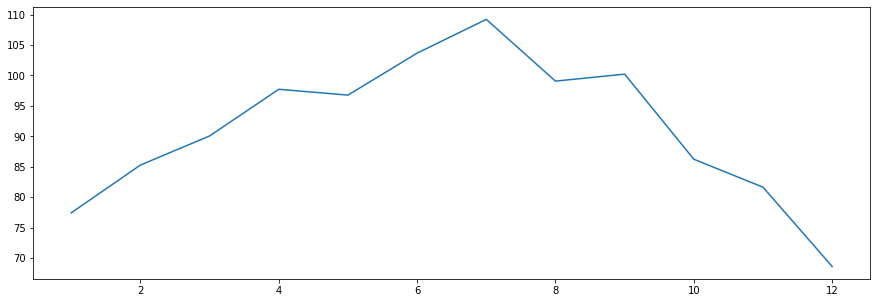

In [ ]:
group_1996_month = aq_1996_df.groupby(by='Month', as_index = False)
plt.figure(figsize=(15, 5))
plt.plot(group_1996_month.median()['Month'], group_1996_month.median()["High"])
plt.show()

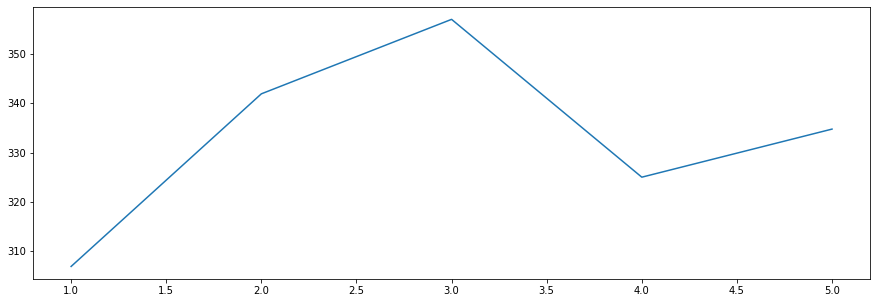

In [ ]:
group_2021_month = aq_2021_df.groupby(by='Month', as_index = False)
plt.figure(figsize=(15, 5))
plt.plot(group_2021_month.median()['Month'], group_2021_month.median()["High"])
plt.show()

In [ ]:
high_values=df[(df["High"]>=500) & (df["High"]<=605)]

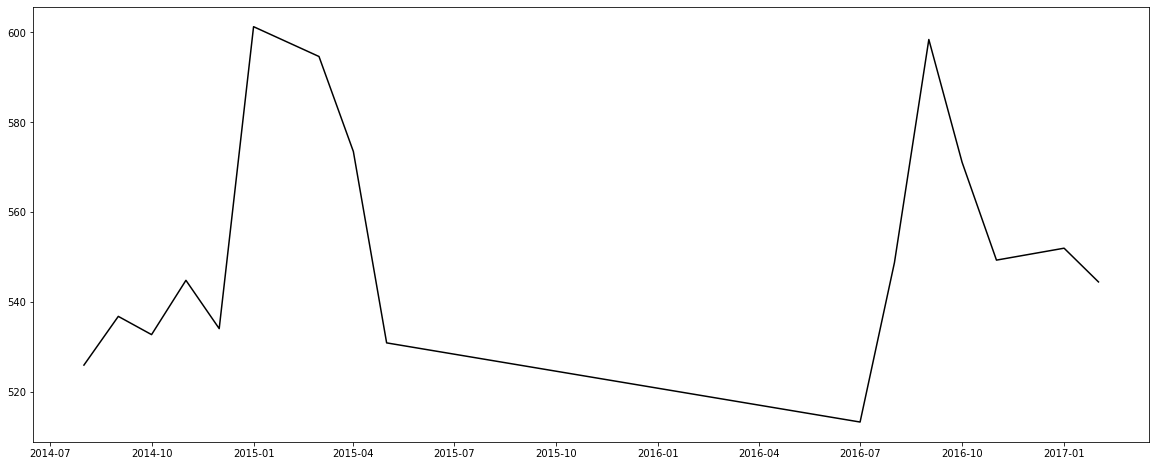

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(high_values["DateTime"],high_values["High"],color="black")
plt.show()

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,306.000000,306.000000,306.000000,306.000000,306.000000,3.060000e+02
mean,174.386293,190.435212,158.937109,174.657305,167.422861,3.073097e+08
std,148.067787,157.940318,137.464378,147.787219,150.969662,3.564575e+08
min,12.168543,14.928023,11.028340,11.957749,9.656515,1.933134e+06
25%,58.981503,66.443121,49.823160,59.077318,45.686662,1.250710e+08
50%,134.558220,147.174530,117.019226,134.031234,121.559017,1.918876e+08
75%,264.896225,288.752830,242.281906,265.897980,263.120605,3.297173e+08
max,591.060303,605.901123,535.555603,578.940308,578.705933,3.110819e+09


<function matplotlib.pyplot.show>

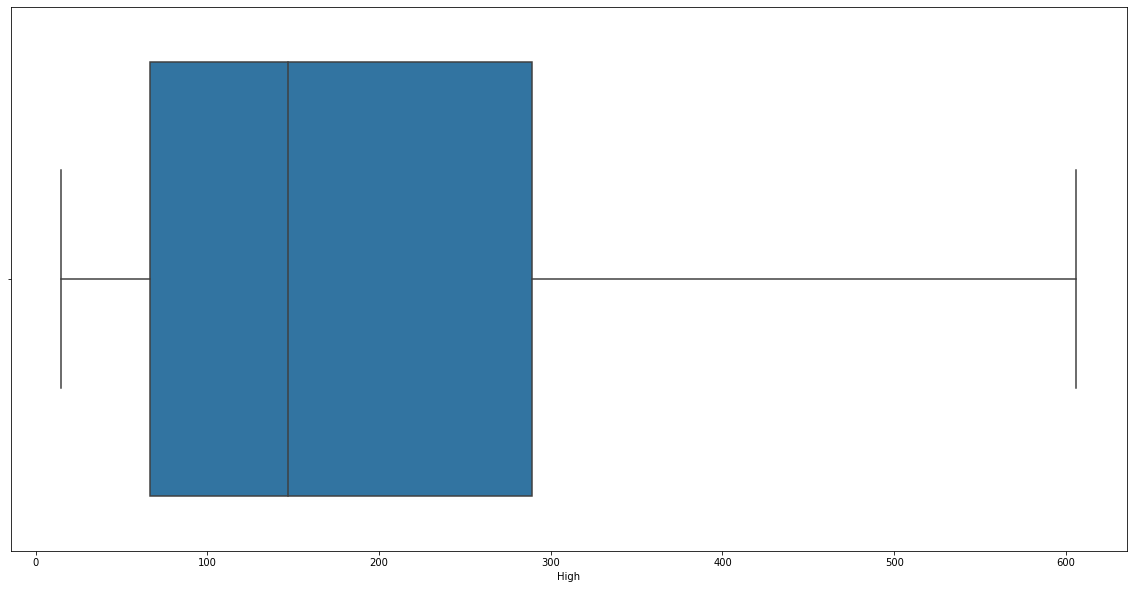

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(df["High"])
plt.show

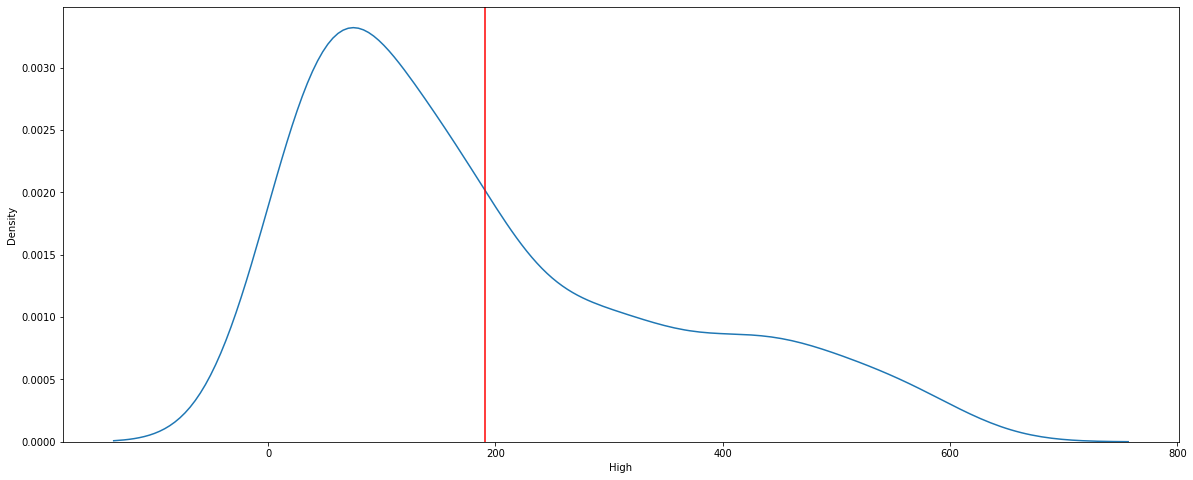

In [ ]:
plt.figure(figsize=(20,8))
sns.distplot(df["High"],bins="sturges",hist=False)
plt.axvline(x=df["High"].mean(),color="r")
plt.show()

#  Sales Campaign analysis

__An introduction to the Facebook advertising platform__<br/>
Along with Google's search and display networks, Facebook is one of the big players when it comes to online advertising. As Facebook users interact with the platform, adding demographic information, liking particular pages and commenting on specific posts, Facebook builds a profile of that user based on who they are and what they're interested in.<br/>
This fact makes Facebook very attractive for advertisers. Advertisers can create Facebook adverts, then create an 'Audience' for that advert or group of adverts. Audiences can be built from a range of attributes including gender, age, location and interests. This specific targetting means advertisers can tailor content appropriately for a specific audience, even if the product being marketed is the same.<br/>

__What do we need from our Facebook ads analysis?__<br/>
When it comes to analysing the Facebook adverts dataset, there are a lot of questions we can ask, and a lot of insight we can generate. However, from a business perspective we want to ask questions that will give us answers we can use to improve business performance.<br/>
Without knowing anything of the company's marketing strategy or campaign objectives, we do not know which key performance indicators (KPIs) are the most important. For example, a new company may be focussed on brand awareness and may want to maximise the amount of impressions, being less concerned about how well these adverts perform in terms of generating clicks and revenue. Another company may simply want to maximise the amount of revenue, while minimising the amount it spends on advertising.<br/>
As these two objectives are very different, it is important to work with the client to understand exactly what they are hoping to achieve from their marketing campaigns before beginning any analysis in order to ensure that our conclusions are relevant and, in particular, actionable. There's not much point in producing a report full of insight, if there's nothing the client can do about it.



__Understanding the dataset__<br/>
The data used in this project is from an anonymous organisation’s social media ad campaign. The data contains 1143 observations in 11 variables. Below are the descriptions of the variables. Since you are working with numpy, refer the `Feature Index` column for the indices of every feature.

|Feature Index|Features|Description|
|----|----|----|
|0|ad_id| unique ID for each ad|
|1|xyz_campaign_id| an ID associated with each ad campaign of XYZ company|
|2|fb_campaign_id| an ID associated with how Facebook tracks each campaign|
|3|age| age of the person to whom the ad is shown|
|4|gender| gender of the person to whom the add is shown|
|5|interest| a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile)|
|6|Impressions| the number of times the ad was shown|
|7|Clicks| number of clicks on for that ad|
|8|Spent| Amount paid by company xyz to Facebook, to show that ad|
|9|Total conversion| Total number of people who enquired about the product after seeing the ad|
|10|Approved conversion| Total number of people who bought the product after seeing the ad|

In [ ]:
s= 8/ 2
s

4.0

Below is a snapshot of the data you will be working with!

Sales Campaign analysis Dataset: https://drive.google.com/file/d/165pPXoZqFwgNrPOZly8BkMk-2vGvIXhk/view?usp=sharing

In [ ]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')
import sys

In [ ]:
# Command to display all the columns of a numpy array
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
a= np.array([1,2,3],dtype =complex)
a

array([1.+0.j, 2.+0.j, 3.+0.j])

### Let's load the data

In [ ]:
url = 'https://raw.githubusercontent.com/rkkirpane/APT-DATA/master/-Statistics-Part-I-master/KAG_conversion_data.csv'
sales_data = np.genfromtxt(url, delimiter=',', skip_header=1, dtype=str)
sales_data


array([['708746', '916', '103916', '30-34', 'M', '15', '7350', '1',
        '1.429999948', '2', '1'],
       ['708749', '916', '103917', '30-34', 'M', '16', '17861', '2',
        '1.820000023', '2', '0'],
       ['708771', '916', '103920', '30-34', 'M', '20', '693', '0', '0',
        '1', '0'],
       ['708815', '916', '103928', '30-34', 'M', '28', '4259', '1',
        '1.25', '1', '0'],
       ['708818', '916', '103928', '30-34', 'M', '28', '4133', '1',
        '1.289999962', '1', '1'],
       ['708820', '916', '103929', '30-34', 'M', '29', '1915', '0', '0',
        '1', '1'],
       ['708889', '916', '103940', '30-34', 'M', '15', '15615', '3',
        '4.769999981', '1', '0'],
       ['708895', '916', '103941', '30-34', 'M', '16', '10951', '1',
        '1.269999981', '1', '1'],
       ['708953', '916', '103951', '30-34', 'M', '27', '2355', '1',
        '1.5', '1', '0'],
       ['708958', '916', '103952', '30-34', 'M', '28', '9502', '3',
        '3.159999967', '1', '0'],
       ['7089

Let's delve into the data to find the answers to some questions

### How many unique ad campaigns (xyz_campaign_id) does this data contain ? And for how many times was each campaign run ?

In [ ]:
np.unique(sales_data[:,1])

array(['1178', '916', '936'], dtype='<U11')

In [ ]:
from collections import Counter
Counter(sales_data[:,1])

Counter({'1178': 625, '916': 54, '936': 464})

### What are the age groups that were targeted through these ad campaigns ?

In [ ]:
np.unique(sales_data[:,3])

array(['30-34', '35-39', '40-44', '45-49'], dtype='<U11')

In [ ]:
Counter(sales_data[:,3])

Counter({'30-34': 426, '35-39': 248, '40-44': 210, '45-49': 259})

In [ ]:
set(sales_data[:,3])

{'30-34', '35-39', '40-44', '45-49'}

### What was the average, minimum and maximum amount spent on the ads ?

In [ ]:
sales_data[:,8].astype(float).max()

639.9499981

In [ ]:
sales_data[:,8].astype(float).min()

0.0

In [ ]:
sales_data[:,8].astype(float).mean()

51.36065613141295

### What is the id of the ad having the maximum number of clicks ?

In [ ]:
max_clicks=sales_data[:,7].astype(int).max()

In [ ]:
sales_data[:,0][sales_data[:,7].astype(int)== max_clicks]

array(['1121814'], dtype='<U11')

### How many people bought the product after seeing the ad with most clicks ? Is that the maximum number of purchases in this dataset  ?

In [ ]:
max_pur_id= sales_data[:,10].astype(int).max()

In [ ]:
sales_data[:,0][sales_data[:,10].astype(int) == max_pur_id]

array(['1121104'], dtype='<U11')

### So the ad with the most clicks didn't fetch the maximum number of purchases. Let's find the details of the product having maximum number of purchases

In [ ]:
details = sales_data[sales_data[:,10].astype(int)== max_pur_id]
details

array([['1121104', '1178', '144533', '30-34', 'M', '16', '2080666',
        '202', '360.1500015', '40', '21']], dtype='<U11')

### Creating additional features

Let's add some additional features that will represent some additional standard metrics.

###  Click Through Rate (CTR)
This is the percentage of how many of our impressions became clicks. A high CTR is often seen as a sign of good creative being presented to a relevant audience. A low click through rate is suggestive of less-than-engaging adverts (design and / or messaging) and / or presentation of adverts to an inappropriate audience. What is seen as a good CTR will depend on the type of advert (website banner, Google Shopping ad, search network test ad etc.) and can vary across sectors, but 2% would be a reasonable benchmark.

### Create a new feature `Click Through Rate`  (CTR) and then concatenate it to the original numpy array 

CTR = $\frac{Clicks}{Impressions}$x100

In [ ]:
ctr= ((sales_data[:,6].astype(int))/(sales_data[:,7].astype(int)))*100
ctr

array([ 735000.        ,  893050.        ,              inf,
        425900.        ,  413300.        ,              inf,
        520500.        , 1095100.        ,  235500.        ,
        316733.33333333,              inf,              inf,
                    inf,              inf,  209557.14285714,
                    inf,  230500.        ,              inf,
        462700.        ,  525650.        ,              inf,
        356600.        ,  609500.        ,  609650.        ,
                    inf,              inf,  372000.        ,
        477825.        ,  548800.        ,              inf,
                    inf,  340242.85714286,  393533.33333333,
        228300.        ,  218200.        ,              inf,
        411892.85714286,  309100.        ,  501400.        ,
        553228.57142857,              inf,              inf,
        536900.        ,  317442.85714286,              inf,
        260380.        ,  250800.        ,  293200.        ,
        278300.        ,

In [ ]:
ctr.shape

(1143,)

In [ ]:
s=ctr.reshape(-1,1)

In [ ]:
np.concatenate((sales_data,s),axis=1)

array([['708746', '916', '103916', '30-34', 'M', '15', '7350', '1',
        '1.429999948', '2', '1', '735000.0'],
       ['708749', '916', '103917', '30-34', 'M', '16', '17861', '2',
        '1.820000023', '2', '0', '893050.0'],
       ['708771', '916', '103920', '30-34', 'M', '20', '693', '0', '0',
        '1', '0', 'inf'],
       ['708815', '916', '103928', '30-34', 'M', '28', '4259', '1',
        '1.25', '1', '0', '425900.0'],
       ['708818', '916', '103928', '30-34', 'M', '28', '4133', '1',
        '1.289999962', '1', '1', '413300.0'],
       ['708820', '916', '103929', '30-34', 'M', '29', '1915', '0', '0',
        '1', '1', 'inf'],
       ['708889', '916', '103940', '30-34', 'M', '15', '15615', '3',
        '4.769999981', '1', '0', '520500.0'],
       ['708895', '916', '103941', '30-34', 'M', '16', '10951', '1',
        '1.269999981', '1', '1', '1095100.0'],
       ['708953', '916', '103951', '30-34', 'M', '27', '2355', '1',
        '1.5', '1', '0', '235500.0'],
       ['708958'